In [1]:
# Import Data Malipulation Libraries
import pandas as pd
import numpy as np

# Import Data Visualisatiobn libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data Filter Libraries
import warnings
warnings.filterwarnings('ignore')

# Import Data Loginggs Libraries
import logging 
logging.basicConfig(level=logging.INFO,
                    filename= 'model.log',
                    filemode= 'w',
                    format='%(asctime)s - %(levelname)s - %(message)s',)
                    

In [2]:
# Creating Our First Log
logging.info('Import Dataset For Model Building...')

In [3]:
url = "https://raw.githubusercontent.com/Arbajshaikh7030/Online_Shoppers_Purchasing_Intention/refs/heads/main/online_shoppers_intention.csv"

data = pd.read_csv(url)

data.sample(frac=1)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
10029,0,0.0000,0,0.0,9,258.291667,0.000000,0.022222,0.000000,0.0,Nov,2,5,3,2,Returning_Visitor,False,False
7715,0,0.0000,1,42.4,61,1140.796667,0.000000,0.002833,0.000000,0.0,June,2,2,6,2,Returning_Visitor,False,False
7516,0,0.0000,0,0.0,24,607.966667,0.000000,0.004167,19.474658,0.0,Nov,4,1,1,2,New_Visitor,False,True
11408,10,261.5000,1,55.5,122,3411.955853,0.010560,0.029876,0.000000,0.0,Nov,2,2,1,13,Returning_Visitor,False,True
7194,8,400.6500,0,0.0,27,952.283333,0.000000,0.001379,0.000000,0.0,Aug,1,8,1,6,New_Visitor,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9784,8,288.0875,0,0.0,20,326.927778,0.033333,0.059464,0.000000,0.0,Dec,3,2,1,1,Returning_Visitor,True,False
11094,0,0.0000,0,0.0,79,4709.992857,0.000000,0.005574,0.000000,0.0,Nov,2,2,6,2,New_Visitor,False,True
11679,2,27.2500,0,0.0,9,219.250000,0.000000,0.033333,75.508333,0.0,Dec,2,2,7,2,Returning_Visitor,False,True
7267,4,265.0000,0,0.0,22,616.203333,0.003846,0.010470,0.000000,0.0,Nov,3,2,6,2,Returning_Visitor,True,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [6]:
data.duplicated().sum()

125

In [7]:
# Removing duplicate rows

data.drop_duplicates()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [8]:
data = pd.read_csv('online_shoppers_intention.csv')

data.loc[data['Revenue']=='FALSE','Revenue'] = 0  
data.loc[data['Revenue']=='TRUE','Revenue'] = 1

data.loc[data['Weekend']=='FALSE','Weekend'] = 0  
data.loc[data['Weekend']=='TRUE','Weekend'] = 1

data = data.astype({'Revenue': 'int64', 'Weekend': 'int64'})  #converts the data type from string to int 

data.dtypes
data.Month = data.Month.replace(
    {'Jan': '1',
    'Feb': '2', 
    'Mar': '3', 
    'Apr': '4',
    'May': '5', 
    'June': '6', 
    'Jul': '7', 
    'Aug': '8', 
    'Sep': '9', 
    'Oct': '10', 
    'Nov': '11', 
    'Dec': '12',
    }).astype(int)





  # get numbers(codes) and corresponding categories(unique)

    
display(data.shape, data.head()) 

(12330, 18)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,Returning_Visitor,1,0


### BI Veriate Analysis ###  



In [9]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,7.651987,2.124006,2.357097,3.147364,4.069586,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,3.392841,0.911325,1.717277,2.401591,4.025169,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,7.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,11.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,12.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000


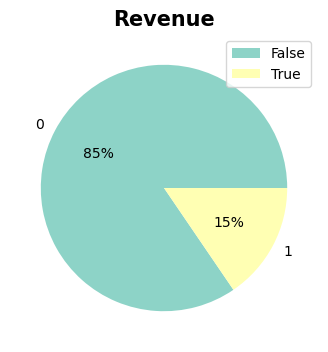

In [10]:
revenue_counts = data['Revenue'].value_counts()

labels = revenue_counts.index
sizes = revenue_counts.values

# Specify the colors for the pie chart
colors = ['#8dd3c7', '#ffffb3']
plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%.0f%%')
plt.title('Revenue', fontsize=15, fontweight='bold')

legend_labels = ['False', 'True']
plt.legend(legend_labels, loc='upper right')

plt.show()

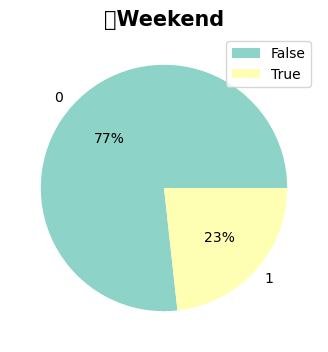

In [11]:
weekend_counts = data['Weekend'].value_counts()

labels = weekend_counts.index
sizes = weekend_counts.values

# Specify the colors for the pie chart
colors = ['#8dd3c7', '#ffffb3']
plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%.0f%%')
plt.title('	Weekend', fontsize=15, fontweight='bold')

legend_labels = ['False', 'True']
plt.legend(legend_labels, loc='upper right')

plt.show()

In [31]:
from sklearn.model_selection import train_test_split

X = data.drop(columns= 'Revenue')
y = data['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
# Using Scaling Technique 

from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()

X_train = scalar.fit_transform(X_train)

X_test = scalar.transform(X_test)

ValueError: could not convert string to float: 'New_Visitor'

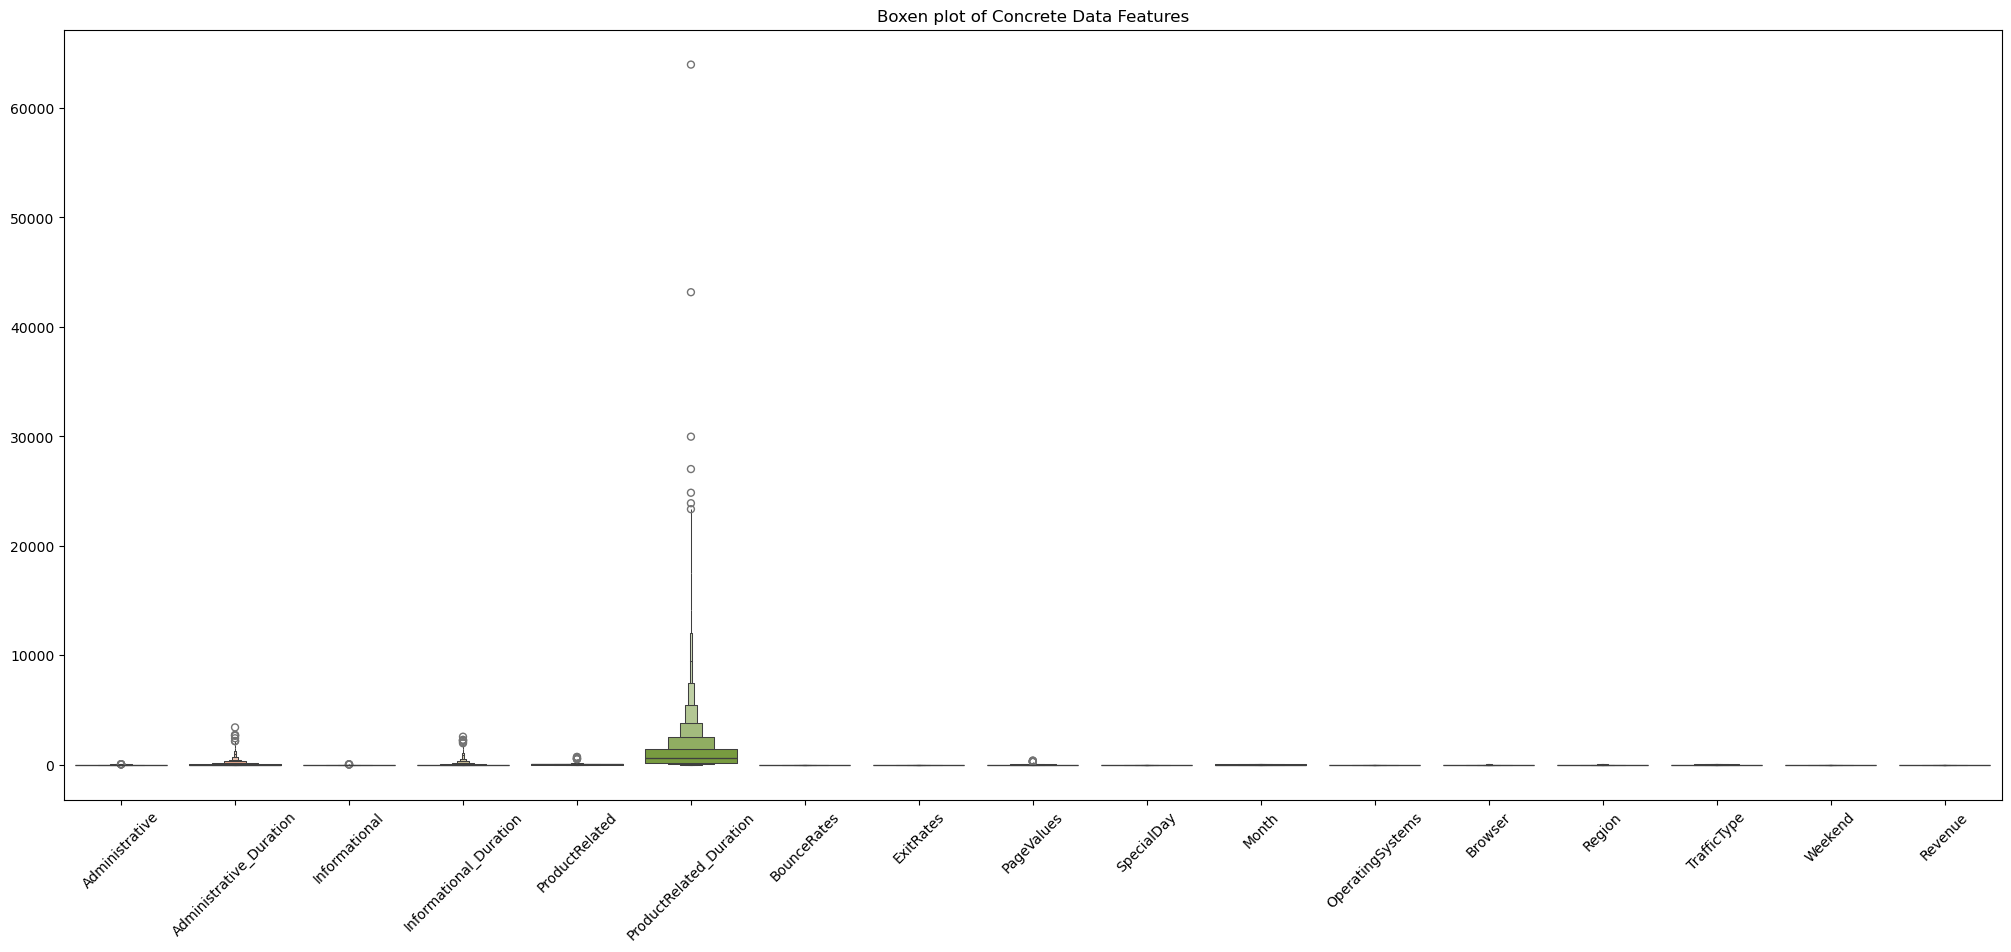

In [45]:
plt.figure(figsize=(25, 10))
sns.boxenplot(data=data)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.title('Boxen plot of Concrete Data Features')
plt.show()

In [46]:
# Using Scaling Technique 

from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()

X_train = scalar.fit_transform(X_train)

X_test = scalar.transform(X_test)

ValueError: could not convert string to float: 'New_Visitor'

In [47]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(X_train, y_train)

y_pred_LR = LR.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

r2_score_LR = r2_score(y_test, y_pred_LR)

r2_score_LR

ValueError: could not convert string to float: 'New_Visitor'